## Présentation générale de l'ensemble de données

___
Plongeons dans le fascinant paysage des données criminelles des États-Unis avec ce dataset riche et complexe. 

Avec pas moins de 127 attributs sélectionnés, chaque ligne de ce tableau offre une fenêtre sur la dynamique sociale et policière des communautés américaines. Ces variables, judicieusement choisies pour leur potentiel prédictif dans le domaine de la criminalité, englobent un vaste éventail de facteurs, allant de la densité urbaine au revenu familial médian, en passant par la situation sociale des habitants. 

Le cœur de cette compilation réside dans la variable "**Crimes violents par habitant**", calculée minutieusement à partir de la population et de la somme des crimes considérés comme violents aux États-Unis. 

Cependant, ce tableau n'est pas simplement une collection de chiffres bruts. Chaque donnée numérique a été normalisée dans une plage décimale allant de 0 à 1, préservant ainsi les nuances des ratios internes tout en permettant des comparaisons significatives. 

Toutefois, derrière cette richesse de données, des défis ont été relevés, des controverses concernant le comptage des viols aux absences de certaines communautés dans les ensembles de données. 

Malgré ces limites, plongeons dans ce tableau, explorons les profondeurs de la criminalité américaine et découvrons les histoires que ces données peuvent raconter ✨
___

# Notre problèmatique

**Prédiction du taux de criminalité violente** 

En utilisant les caractéristiques **socio-économiques et démographiques** des crimes commis aux Etats-Unis, nous allons essayer de prédire le taux de criminalité violente dans différents états.

In [49]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/communities-and-crime/communities+and+crime/communities.names
/kaggle/input/communities-and-crime/communities+and+crime/communities.data


# I - Analyse des données du dataset

Dans le but de comprendre nos données , on a effectué certains tests liés aux élements qu'on a vu en classe afin de pouvoir lire, explorer et déduire des conclusions.

Dans un premier temps, nous allons renommer les colonnes de notre tableau avec des noms significatifs, étant donné qu'il s'agit uniquement de chiffres bruts à l'état initial du dataset.

In [50]:
import pandas as pd
import numpy as np

In [51]:
# Charger le fichier communities.data dans un DataFrame
communities_and_crime = pd.read_csv('/kaggle/input/communities-and-crime/communities+and+crime/communities.data')

# Redéfinition des noms de colonnes
communities_and_crime.columns=['state','county', 'community','communityname','fold','population', 'householdsize','racepctBlack','racepctWhite','racepctAsian',
                               'racepctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome', 'pctWWage', 'pctWFarmSelf',
                               'pctWInvInc', 'pctWSocSec', 'pctWPubAsst','pctWRetire', 'medFamInc', 'perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap',
                               'OtherPerCap','HispPerCap','NumUnderPov', 'PctPopUnderPov','PctLess9thGrade','PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 
                               'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam', 'PctFam2Par', 'PctKids2Par',
                               'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8', 
                               'PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10', 'PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 
                               'PersPerOwnOccHous','PersPerRentOccHous', 'PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
                               'PctVacMore6Mos', 'MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ',
                               'MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85',
                               'PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol',
                               'PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens',
                               'PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']

# Afficher le nombre de lignes (crimes) commis
print("Nombre de crimes dans le dataset (lignes): \n ->", len(communities_and_crime))
print("=========================================")

# Afficher les noms des colonnes, qui sont les "features"
print("Nombre de colonnes : \n ->", len(communities_and_crime.columns))
print("=========================================")
print("Noms des features du dataset :\n\n", communities_and_crime.columns)


print("----------------------------------------------------------------------------------")
# Afficher un aperçu des données avec des valeurs manquantes 
print(communities_and_crime.head())

####################################################
# Remplacer les '?' par NaN
communities_and_crime.replace('?', "NaN", inplace=True)
####################################################

print("----------------------------------------------------------------------------------")
# Afficher un aperçu des données après remplacement des valeurs manquantes 
print(communities_and_crime.head())

Nombre de crimes dans le dataset (lignes): 
 -> 1993
Nombre de colonnes : 
 -> 128
Noms des features du dataset :

 Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctBlack', 'racepctWhite', 'racepctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)
----------------------------------------------------------------------------------
   state county community        communityname  fold  population  \
0     53      ?         ?          Tukwilacity     1        0.00   
1     24      ?         ?         Aberdeentown     1        0.00   
2     34      5     81440  Willingborotownship     1        0.04   
3     42     95      6096    Bethlehemtownship     1        0.01   
4      6      ?         ?    SouthPasadenacity     1        0.

> * Nous remarquons donc que chaque **ligne** de notre dataset représente **une communauté (ou une ville)** aux États-Unis.
> * Par exemple, pour le première ville, on peut voir la moyenne du nombre de personnes d'un foyer, les origines raciales de sa population (en pourcentage), leurs tranches d'âge...etc.
> * D'apès la description du dataset sur 
[https://archive.ics.uci.edu/dataset/183/communities+and+crime](http://archive.ics.uci.edu/dataset/183/communities+and+crime), les 127 premières colonnes représentent des **features**, tandis que la dernière colonne (**ViolentCrimesPerPop**) représente la **target**.

___
Dans le contexte de notre dataset, les criminalités violentes représentent : *les meurtres, les viols, les vols et les agressions.*

Nous avons ainsi la colonne target **ViolentCrimesPerPop** qui est décrite comme suit : 

> *ViolentCrimesPerPop = nombre total de crimes violents par 100K personnes*

Dans notre cas, les valeurs sont continues et elles varient entre 0 et 1. 

Etant des valeurs pas très variées et pour avoir une meilleure lisibilité des valeurs réelles, nous allons créer une nouvelle colonne nommée **Numeric_ViolentCrimesPerPop** qui va contenir des intervalles de valeurs plutôt que des valeurs discrètes, qui correspondent aux valeurs normalisées de *ViolentCrimesPerPop*.
___

In [52]:
import matplotlib.pyplot as plt
#### Transformer les données continues en intervalles pour mieux voir leur fréquence

intervals = [(0.000, 0.067), (0.067, 0.133), (0.133, 0.200), (0.200, 0.267),
             (0.267, 0.333), (0.333, 0.400), (0.400, 0.467), (0.467, 0.533),
             (0.533, 0.600), (0.600, 0.667), (0.667, 0.733), (0.733, 0.800),
             (0.800, 0.867), (0.867, 0.933), (0.933, 1.000)]

values = [(0.000, 0.067), (0.067, 0.133), (0.133, 0.200), (0.200, 0.267),
             (0.267, 0.333), (0.333, 0.400), (0.400, 0.467), (0.467, 0.533),
             (0.533, 0.600), (0.600, 0.667), (0.667, 0.733), (0.733, 0.800),
             (0.800, 0.867), (0.867, 0.933), (0.933, 1.000)]

def map_values(x):
    for interval, value in zip(intervals, values):
        if interval[0] <= x and x <= interval[1]:
            return value
        
#####################################################################################################################
        
# Créer une nouvelle colonne avec les valeurs numériques des totaux de crimes violents
communities_and_crime['Numeric_ViolentCrimesPerPop'] = communities_and_crime['ViolentCrimesPerPop'].apply(map_values)

# Afficher les fréquences des intervalles de valeurs pour la colonne "Numeric_ViolentCrimesPerPop"
count = communities_and_crime.groupby('Numeric_ViolentCrimesPerPop').size().sort_values(ascending=False)

#affichage du résultat
print(count)

Numeric_ViolentCrimesPerPop
(0.0, 0.067)      484
(0.067, 0.133)    420
(0.133, 0.2)      283
(0.2, 0.267)      177
(0.267, 0.333)    142
(0.333, 0.4)      113
(0.467, 0.533)     76
(0.4, 0.467)       59
(0.533, 0.6)       57
(0.933, 1.0)       50
(0.6, 0.667)       38
(0.667, 0.733)     37
(0.8, 0.867)       23
(0.733, 0.8)       20
(0.867, 0.933)     14
dtype: int64


> En observant la répartition du taux de criminalité dans les données, on constate uque le taux de criminalité aux États-Unis varie considérablement d'une communauté à l'autre. 
> 
> Les intervalles les plus représentés dans le dataset se situent dans la plage **inférieure** du taux de criminalité, avec plus de la moitié des communautés ayant un taux de criminalité compris entre 0 et 0,133. 
> 
> Cependant, d'autres communautés présentent également des taux de criminalité plus élevés, comme en témoigne la présence de valeurs dans les intervalles **supérieurs**, jusqu'à 1,00. 
> 
> Cette diversité suggère l'existence de multiples facteurs **socio-économiques et démographiques** qui influencent le niveau de criminalité dans les différentes régions des États-Unis.

### **Retrouver les états avec les taux de criminalité les plus élevés**

___
**Important ⚠️**

Dans la description du dataset, on a cette information : 

> *US state (by number) - not counted as predictive, but if considered, should be consided nominal*

Les États ne peuvent pas être classés dans un ordre numérique significatif (comme on le ferait avec des nombres), mais ils représentent plutôt des catégories distinctes sans aucune hiérarchie intrinsèque. 

Ainsi, les États seront traités comme des catégories distinctes sans ordre spécifique.
___

In [53]:
import seaborn as sns

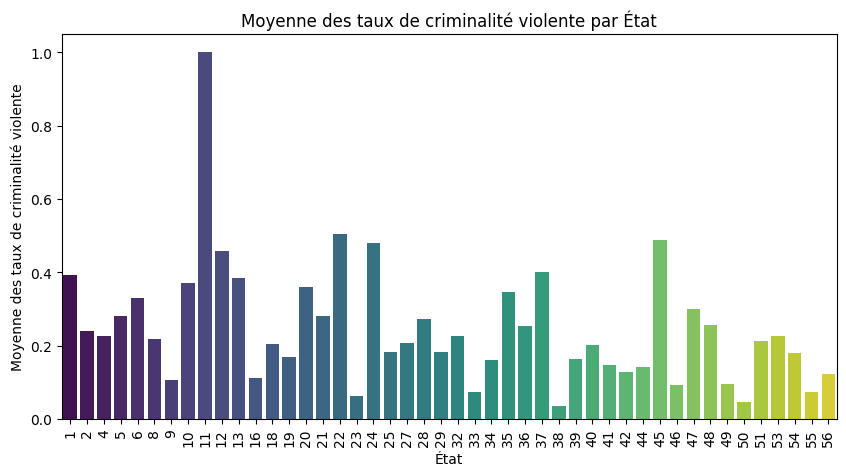

In [54]:
# Calculer la moyenne du taux de criminalité pour chaque état
state_crime_means = communities_and_crime.groupby('state')['ViolentCrimesPerPop'].mean().reset_index()

# Trier les états par taux de criminalité moyen pour une meilleure visualisation
state_crime_means = state_crime_means.sort_values(by='ViolentCrimesPerPop', ascending=False)

# Créer le graphique à barres
plt.figure(figsize=(10, 5))
sns.barplot(x='state', y='ViolentCrimesPerPop', data=state_crime_means, palette='viridis')

plt.xlabel('État')
plt.ylabel('Moyenne des taux de criminalité violente')
plt.title('Moyenne des taux de criminalité violente par État')
plt.xticks(rotation=90)  # Rotation des labels de l'axe x pour une meilleure lisibilité
plt.show()

___
Pour mieux comprendre les facteurs ainsi que les critères ayant conduit à ces taux de criminalité violente assez élevés, nous allons analyser ces données en **3** catégories : 
 
1. Caractéristiques **démographiques**
2. Caractéristiques **économiques**
3. Caractéristiques **sociales**

Pour plus de lisibilité, nous allons nous baser sur les **10** états ayant la moyenne de taux de criminialité la plus élevée.
___

In [55]:
# Sélectionner les 10 états avec la moyenne de taux de criminalité la plus élevée
top_10_states = state_crime_means.head(10)

# Afficher les résultats sans les index
print(top_10_states.to_string(index=False))

 state  ViolentCrimesPerPop
    11             1.000000
    22             0.504545
    45             0.486786
    24             0.480000
    12             0.458333
    37             0.401957
     1             0.393721
    13             0.384054
    10             0.370000
    20             0.360000


### A. Caractéristiques démographiques :
___

Après une bonne analyse des colonnes du tableau, nous avons pu identifier ces attributs qui reflètent l'aspect démographique des habitants :

- **population**: La population totale de la communauté.


- **householdsize**: La taille moyenne des ménages dans la communauté.

- **racepctBlack**: Le pourcentage de la population qui est afro-américaine.
- **racepctWhite**: Le pourcentage de la population qui est caucasienne.
- **racepctAsian**: Le pourcentage de la population qui est d'origine asiatique.
- **racepctHisp**: Le pourcentage de la population qui est d'origine hispanique.

- **agePct12t21**: Le pourcentage de la population âgée de 12 à 21 ans.
- **agePct12t29**: Le pourcentage de la population âgée de 12 à 29 ans.
- **agePct16t24**: Le pourcentage de la population âgée de 16 à 24 ans.
- **agePct65up**: Le pourcentage de la population âgée de 65 ans et plus.

- **numbUrban**: Le nombre de personnes vivant dans des zones urbaines.
- **pctUrban**: Le pourcentage de la population vivant dans des zones urbaines.
---
En vue du nombre important de ces caractéristiques, nous allons procéder au *Feature Engineering* pour essayer de créer des features plus simples et facile à utiliser.

Voici donc quelques nouvelles features que l'on pourrait créer :

> **Indice de jeunesse (youthIndex):**
> 
> Un indice combinant les pourcentages de la population âgée de 12 à 21 ans, de 12 à 29 ans et de 16 à 24 ans. 
> Cela pourrait refléter le degré de jeunesse de la population.


> **Ratio de diversité ethnique (ethnicDiversityRatio)**:
>
> Un indice de la diversité ethnique de la communauté, calculé en mesurant la variance des pourcentages de chaque groupe ethnique. 
> Plus la valeur est élevée, plus la diversité ethnique est grande.



In [56]:
# Créer la colonne youthIndex
communities_and_crime['youthIndex'] = (communities_and_crime['agePct12t21'] + communities_and_crime['agePct12t29'] + communities_and_crime['agePct16t24']) / 3

# Calculer la variance des pourcentages ethniques
ethnic_columns = ['racepctBlack', 'racepctWhite', 'racepctAsian', 'racepctHisp']
communities_and_crime['ethnicDiversityRatio'] = communities_and_crime[ethnic_columns].var(axis=1)

# Afficher les premières lignes du dataset avec les nouvelles features
print(communities_and_crime[['youthIndex', 'ethnicDiversityRatio']].head())

   youthIndex  ethnicDiversityRatio
0    0.400000              0.097767
1    0.380000              0.062433
2    0.450000              0.202767
3    0.330000              0.201825
4    0.353333              0.167358


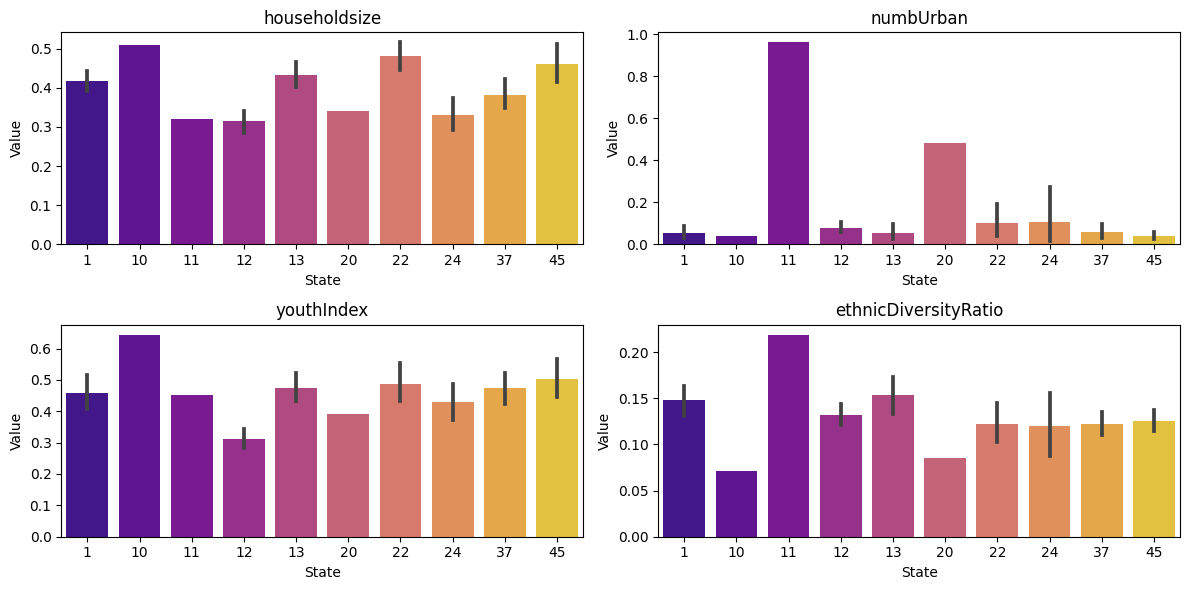

In [57]:
# Sélectionner les 10 premiers états
top_10_states = state_crime_means.head(10)['state']

# Sélectionner les colonnes à afficher
columns_to_plot = ['householdsize', 'numbUrban', 'youthIndex', 'ethnicDiversityRatio']

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for i, col in enumerate(columns_to_plot):
    
    # Sélectionner les données pour la colonne spécifique
    data = communities_and_crime.loc[communities_and_crime['state'].isin(top_10_states), ['state', col]]
    data = data.sort_values(by='state')
    
    # Créer le graphique à barres
    ax = axs[i // 2, i % 2]
    sns.barplot(x='state', y=col, data=data, palette='plasma', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('State')
    ax.set_ylabel('Value')


# Afficher les graphiques
plt.tight_layout()
plt.show()

> D'après les résultats de ces graphiques, nous remarquons que les facteurs démographiques majeurs de la criminalité violente élevée dans ces états sont :  **la jeunesse** et **le nombre élevé de personnes dans un foyer**
>
> De même, on voit que ces états n'ont pas un grand nombre de personnes vivant dans des zones urbaines (mise à part l'état 11), ce qui peut suugérer que ces villes sont principalement rurales et de petit nombre de population totale.
>
> En plus, le ratio de diversité ethnique reste tout de même considérable mais peu comparé aux taux généraux aux Etats-Unis , avec des pourcentages assez rapprochés entre ces états, ce qui peut refléter également des problèmes d'intégration. 



### B. Caractéristiques économiques :
___

Après une bonne analyse des colonnes du tableau, nous avons pu identifier ces attributs qui reflètent l'aspect économique des habitants :


#### REVENUES

* medIncome: Le revenu médian des foyers dans la communauté.
* pctWWage: Le pourcentage de ménages ayant un revenu salarial en 1989.
* pctWFarmSelf: Le pourcentage de ménages ayant un revenu d'exploitation agricole ou d'auto-emploi en 1989.
* pctWInvInc: Le pourcentage de ménages ayant un revenu d'investissement ou de location en 1989.
* pctWSocSec: Le pourcentage de ménages ayant un revenu de sécurité sociale en 1989.
* pctWPubAsst: Le pourcentage de ménages ayant une aide publique en 1989.
* pctWRetire: Le pourcentage de ménages ayant un revenu de retraite en 1989.
* medFamInc: Le revenu médian des familles (différent du revenu des ménages pour les ménages non familiaux).
* perCapInc: Le revenu par habitant.
* whitePerCap: Le revenu par habitant pour les caucasiens.
* blackPerCap: Le revenu par habitant pour les afro-américains.
* indianPerCap: Le revenu par habitant pour les amérindiens.
* AsianPerCap: Le revenu par habitant pour les personnes d'origine asiatique.
* OtherPerCap: Le revenu par habitant pour les personnes d'autres origines.
* HispPerCap: Le revenu par habitant pour les personnes d'origine hispanique.

#### PAUVRETE

* NumUnderPov: Le nombre de personnes sous le seuil de pauvreté.
* PctPopUnderPov: Le pourcentage de personnes sous le seuil de pauvreté.

#### EMPLOI

* PctUnemployed: Le pourcentage de personnes de 16 ans et plus, dans la population active, et au chômage.
* PctEmploy: Le pourcentage de personnes de 16 ans et plus employées.
* PctEmplManu: Le pourcentage de personnes de 16 ans et plus employées dans la fabrication.
* PctEmplProfServ: Le pourcentage de personnes de 16 ans et plus employées dans les services professionnels.
* PctOccupManu: Le pourcentage de personnes de 16 ans et plus employées dans la fabrication.
* PctOccupMgmtProf: Le pourcentage de personnes de 16 ans et plus employées dans la gestion ou les professions libérales.

---
En vue du nombre important de ces caractéristiques, nous allons procéder au *Feature Engineering* pour essayer de créer des features plus simples et facile à utiliser.

Voici donc quelques nouvelles features que l'on va créer :
___
Revenus agrégés :

> **TotalIncome**: Le revenu total agrégé, combinant les revenus médians des ménages, des familles et par habitant.
>
> **PctLowIncome**: Le pourcentage de personnes vivant avec un revenu inférieur à un certain seuil basé sur les différentes mesures de revenu.

___
Pauvreté et emploi :


> **PovertyEmploymentRatio**: Le ratio entre le pourcentage de personnes sous le seuil de pauvreté et le pourcentage total d'emplois, donnant un aperçu de l'ampleur de la pauvreté relative au niveau d'emploi dans la communauté.
>
> **UnemploymentRate**: Le taux de chômage, indiquant la proportion de la population active sans emploi.


In [58]:
# Création des nouvelles features

# Revenus agrégés
# The average family in the USA is consisted of 3 persons => communities_and_crime['perCapInc']*3
communities_and_crime['TotalFamIncome'] = (communities_and_crime['medIncome'] + communities_and_crime['medFamInc'] + communities_and_crime['perCapInc']*3)/3
communities_and_crime['PctLowIncome'] = (communities_and_crime['NumUnderPov'] / communities_and_crime['population'])

# Pauvreté et emploi
communities_and_crime['PovertyEmploymentRatio'] = (communities_and_crime['PctPopUnderPov'] / communities_and_crime['PctEmploy'])
communities_and_crime['UnemploymentRate'] = communities_and_crime['PctUnemployed']

# Afficher les premières lignes du tableau pour vérifier les nouvelles colonnes
print(communities_and_crime[['TotalFamIncome', 'PctLowIncome', 'PovertyEmploymentRatio', 'UnemploymentRate']].head())

   TotalFamIncome  PctLowIncome  PovertyEmploymentRatio  UnemploymentRate
0        0.570000           inf                0.328767              0.27
1        0.463333           inf                0.465517              0.36
2        0.723333          0.25                0.140845              0.33
3        0.750000          0.00                0.092308              0.12
4        1.100000          0.50                0.184615              0.10


In [59]:
import warnings

# Ignorer les warnings de type RuntimeWarning liés au valeurs NaN
warnings.filterwarnings("ignore", category=RuntimeWarning)

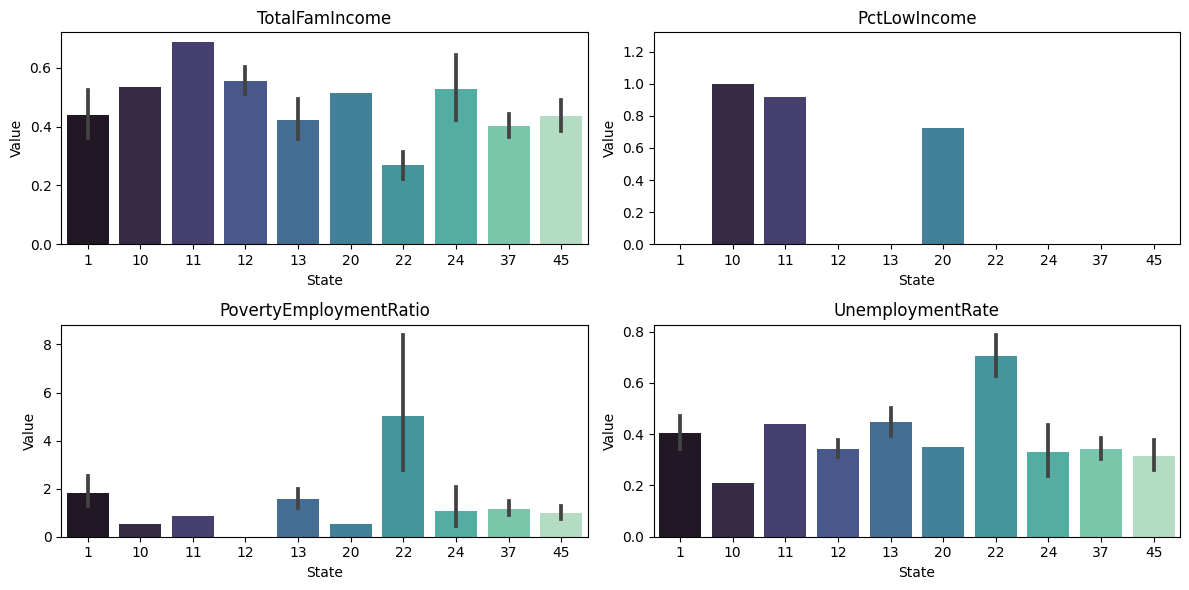

In [60]:
# Sélectionner les colonnes à afficher
columns_to_plot = ['TotalFamIncome', 'PctLowIncome', 'PovertyEmploymentRatio', 'UnemploymentRate']

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for i, col in enumerate(columns_to_plot):
    
    # Sélectionner les données pour la colonne spécifique
    data = communities_and_crime.loc[communities_and_crime['state'].isin(top_10_states), ['state', col]]
    data = data.sort_values(by='state')
    
    # Créer le graphique à barres
    ax = axs[i // 2, i % 2]
    sns.barplot(x='state', y=col, data=data, palette='mako', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('State')
    ax.set_ylabel('Value')


# Afficher les graphiques
plt.tight_layout()
plt.show()

> - Les graphiques ci-dessus révèlent une tendance préoccupante : les états avec des taux de criminalité les plus élevés affichent généralement une forte proportion de personnes vivant sous le seuil de pauvreté.
> De même, on peut facilement remarquer que les revenus familiaux totaux dans ces états sont pour la majorité en dessous de la moyenne.
> 
> - De plus, le taux de chômage y est alarmant, touchant près de la moitié de la population.
> 
> Cependant, le ratio entre le pourcentage de personnes vivant dans la pauvreté et le pourcentage total de travailleurs nous mène à deux conclusions : 
>
> - Le première, c'est que dans certains états, ce ration est assez élévé, ce qui serait fortement justifié par un taux de chommage considérable, ce qui induit à des taux de povreté très significatifs et donc à plus d'exposition à commetre des crimes violents comme les vols et les aggressions. 
>
> - La deuxième, c'est que dans d'autres états le ration est moins de 1, ce qui signifie qu'il y a plus de travailleurs que de personnes pauvres. Cela donc suggère que même ceux qui sont employés pourraient ne pas gagner suffisamment pour subvenir à leurs besoins face au coût de la vie.

### C. Caractéristiques sociales :
___

Après une bonne analyse des colonnes du tableau, nous avons pu identifier ces attributs qui reflètent l'aspect social des habitants :

Caractéristiques sociales :

#### NIVEAU D'ETUDE

* PctLess9thGrade: Le pourcentage de personnes de 25 ans et plus ayant moins qu'une éducation de 9e année.
* PctNotHSGrad: Le pourcentage de personnes de 25 ans et plus qui ne sont pas diplômées de l'école secondaire.
* PctBSorMore: Le pourcentage de personnes de 25 ans et plus avec un diplôme de baccalauréat ou plus.

#### SITUATION SOCIALE

* MalePctDivorce: Le pourcentage d'hommes divorcés.
* MalePctNevMarr: Le pourcentage d'hommes jamais mariés.
* FemalePctDiv: Le pourcentage de femmes divorcées.
* TotalPctDiv: Le pourcentage de la population divorcée.
* PersPerFam: Le nombre moyen de personnes par famille.
* PctFam2Par: Le pourcentage de familles (avec enfants) dirigées par deux parents.
* PctKids2Par: Le pourcentage d'enfants dans des foyers familiaux avec deux parents.
* PctYoungKids2Par: Le pourcentage d'enfants de 4 ans et moins dans des foyers avec deux parents.
* PctTeen2Par: Le pourcentage d'enfants de 12 à 17 ans dans des foyers avec deux parents.
* PctWorkMomYoungKids: Le pourcentage de mères d'enfants de 6 ans et moins dans la population active.
* PctWorkMom: Le pourcentage de mères d'enfants de moins de 18 ans dans la population active.

---
En vue du nombre important de ces caractéristiques, nous allons procéder au *Feature Engineering* pour essayer de créer des features plus simples et facile à utiliser.

Voici donc quelques nouvelles features que l'on va créer :
___

Education et emploi :

> **EducatedEmployed**: Le pourcentage de personnes ayant au moins un diplôme d'études secondaires et étant employées.
>
> **ManuEmploymentRatio**: Le ratio entre le pourcentage d'emplois dans le secteur "*manufacturier*" et le pourcentage total d'emplois, indiquant l'importance relative de ce secteur dans l'emploi local.
>
> **ProfServEmployment**: Le pourcentage d'emplois dans les "*services professionnels*" par rapport à l'ensemble des emplois, reflétant la part de l'emploi dans ce secteur.

___
Situation sociale et familiale :


> **DivorceRate**: Le taux de divorce, calculé en combinant les pourcentages de personnes divorcées.
>
> **FamilyStructure**: Une variable catégorielle indiquant la structure familiale dominante dans la communauté (monoparentale, biparentale).
>
> **WorkingMothers**: Le pourcentage de mères de jeunes enfants (moins de 6 ans) travaillant par rapport à l'ensemble des mères actives, mettant en évidence la participation des mères au marché du travail malgré les responsabilités familiales.


In [61]:
# Création des nouvelles features

# Education et emploi
communities_and_crime['EducatedEmployed'] = (100 - communities_and_crime['PctNotHSGrad']) * (communities_and_crime['PctEmploy'] / 100)
communities_and_crime['ManuEmploymentRatio'] = communities_and_crime['PctEmplManu'] / (1 - communities_and_crime['PctUnemployed'])
communities_and_crime['ProfServEmployment'] = (communities_and_crime['PctEmplProfServ'] / (100 - communities_and_crime['PctUnemployed'])) * 100

# Situation sociale et familiale
communities_and_crime['DivorceRate'] = (communities_and_crime['MalePctDivorce'] + communities_and_crime['FemalePctDiv'] + communities_and_crime['TotalPctDiv']) / 3
communities_and_crime['FamilyStructure'] = communities_and_crime.apply(
    lambda row: 'Biparentale' if row['PctFam2Par'] > 50 else 'Monoparentale', axis=1)
communities_and_crime['WorkingMothers'] = (communities_and_crime['PctWorkMom'] + communities_and_crime['PctWorkMomYoungKids'])/2

print(communities_and_crime[['EducatedEmployed', 'ManuEmploymentRatio', 'ProfServEmployment', 'DivorceRate', 'FamilyStructure', 'WorkingMothers']].head())

   EducatedEmployed  ManuEmploymentRatio  ProfServEmployment  DivorceRate  \
0          0.728248             0.780822            0.150406     0.970000   
1          0.577506             0.500000            0.291048     0.680000   
2          0.708225             0.537313            0.451490     0.423333   
3          0.648050             0.761364            0.380457     0.210000   
4          0.649220             0.211111            0.770771     0.560000   

  FamilyStructure  WorkingMothers  
0   Monoparentale           0.495  
1   Monoparentale           0.690  
2   Monoparentale           0.855  
3   Monoparentale           0.500  
4   Monoparentale           0.365  


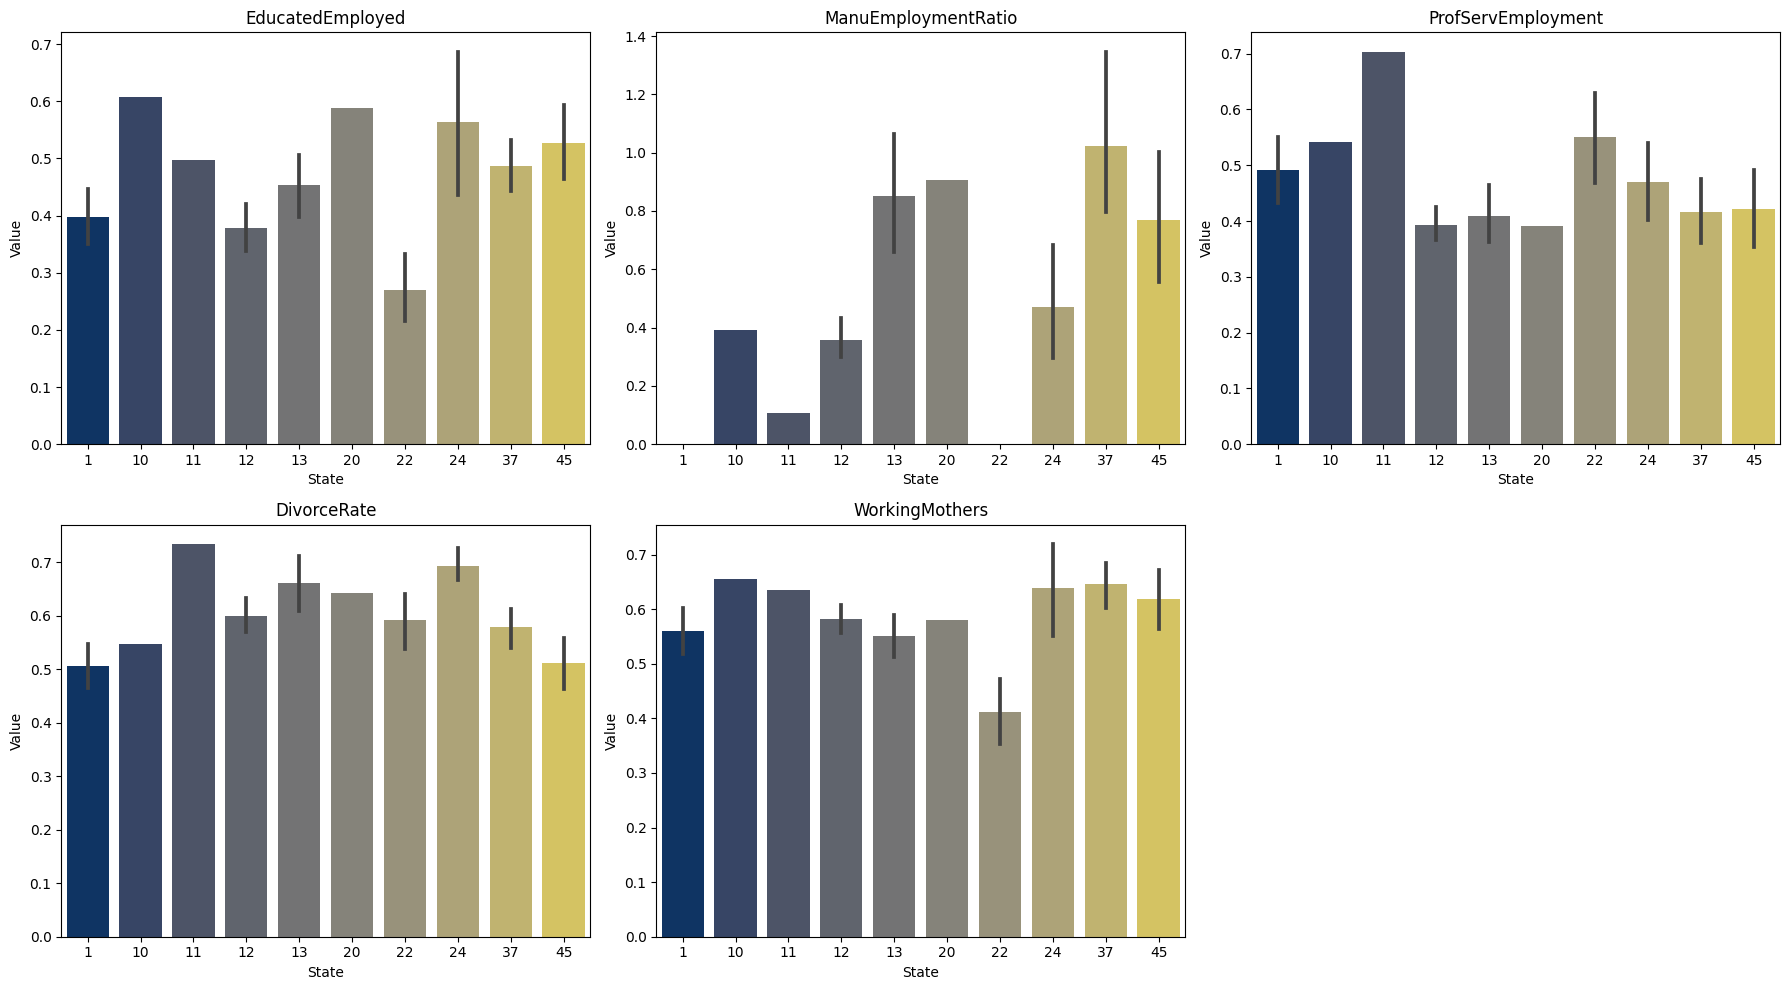

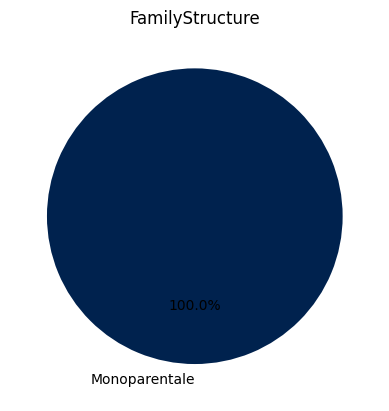

In [62]:
# Sélectionner les colonnes à afficher
columns_to_plot = ['EducatedEmployed', 'ManuEmploymentRatio', 'ProfServEmployment', 'DivorceRate', 'WorkingMothers']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(columns_to_plot):
    
    # Sélectionner les données pour la colonne spécifique
    data = communities_and_crime.loc[communities_and_crime['state'].isin(top_10_states), ['state', col]]
    data = data.sort_values(by='state')
    
    # Créer le graphique à barres
    ax = axs[i // 3, i % 3]
    sns.barplot(x='state', y=col, data=data, palette='cividis', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('State')
    ax.set_ylabel('Value')

# Supprimer les axes inutilisés
for j in range(5, len(axs.flatten())):
    fig.delaxes(axs[j // 3, j % 3])
    
# Afficher les graphiques
plt.tight_layout()
plt.show()




data = communities_and_crime.loc[communities_and_crime['state'].isin(top_10_states), ['state', 'FamilyStructure']]
data = data.sort_values(by='state')

# Compter le nombre de chaque valeur dans la colonne "FamilyStructure"
value_counts = data['FamilyStructure'].value_counts()

# Créer le graphique circulaire avec les comptages
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.cividis.colors)
plt.title('FamilyStructure')
plt.show()


> Dans le domaine de l'éducation, les graphiques montrent un faible nombre de jeunes diplômés et employés dans ces villes. De plus, les métiers ne nécessitant pas de diplômes élevés sont sous-représentés, rendant l'accès à l'emploi difficile pour beaucoup. Cette situation peut pousser certains à commettre des crimes pour survivre.
> 
> En examinant le contexte familial, on observe une forte corrélation avec plusieurs indicateurs. Dans ces villes, les taux de divorce sont élevés, avec plus de la moitié des couples mariés qui se séparent. 
>
> Cela entraîne une prévalence de familles monoparentales, où l'éducation des enfants devient une tâche ardue. De plus, le pourcentage de mères travaillant est élevé, ce qui suggère que dans la majorité des familles monoparentales, c'est la mère qui est le parent responsable. Elle doit jongler entre l'éducation des enfants, les tâches ménagères et un emploi souvent mal rémunéré. 
>
> Ce manque de temps et de ressources peut conduire à une éducation insuffisante des enfants, contribuant ainsi à une augmentation du taux de criminalité dans ces villes.

# II - Application des algorithmes d'apprentissage supervisé sur les données : Prédiction du taux de crimes violents


Pour notre tâche de prédiction de la colonne **ViolentCrimesPerPop** en utilisant des algorithmes d'apprentissage supervisé, nous allons considérer plusieurs algorithmes adaptés à une tâche de régression, étant donné que nous prédisons une valeur numérique. 

Voici les algorithmes d'apprentissage supervisé sur lesquels on va entrainer nos modèles :

1. *Régression linéaire*

2. *Arbres de décision*

3. *Forêts aléatoires*

4. *Algorithme K-NN*

5. *Algorithme de Support Vector Machine (SVM)*

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

___
### **Mean Squarred Error**
> L'erreur quadratique moyenne (MSE, pour Mean Squared Error) est une mesure de la qualité d'un estimateur, en particulier dans les modèles de régression. Elle est calculée comme la moyenne des carrés des écarts entre les valeurs observées (réelles) et les valeurs prédites par le modèle. Plus la MSE est faible, meilleur est le modèle.
___

## A. Selon les caractéristiques économiques :

On va appliquer les algorithmes de **Régression linéaire** et de **Support Vector Machine Regression (SVM-R)** en prenant en compte plusieurs features : 
* **TotalFamIncome:** Le revenu total agrégé, combinant les revenus médians des ménages, des familles et par 3 habitants.
* **UnemploymentRate:** Le taux de chômage, indiquant la proportion de la population active sans emploi.


___
## Protocole expérimental : 
Séparation des données en deux parties : **80%** pour l'apprentissage et **20%** pour la validation.

In [64]:
# X : Caractéristiques économiques
X = communities_and_crime[['TotalFamIncome', 'UnemploymentRate']]  
# y : Taux de crimes violents par population
y = communities_and_crime['ViolentCrimesPerPop']

In [65]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

___

### **1. Algorithme de Regression linéaire :**

> C'est le choix de base pour les problèmes de régression, notamment lorsque les relations entre les caractéristiques et la variable cible sont linéaires.
> Simple à comprendre et à interpréter, ce qui en fait un bon point de départ.

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialiser le modèle de régression linéaire
linear_reg = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
linear_reg.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = linear_reg.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)

# Effectuer une validation croisée
cv_scores = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()
print("Mean Squared Error (Cross-Validation):", mse_cv)
print("Mean Squared Error (Linear Regression):", mse)


Mean Squared Error (Cross-Validation): 0.03996825381242418
Mean Squared Error (Linear Regression): 0.04205750704874833


> - La validation croisée n'a pas permis de réduire le MSE par rapport aux résultats de la régression linéaire classique 
> 
> - Cependant, ça reste une bonne pratique pour éviter l'**overfitting**

#### **Diagramme de dispersion avec ligne de régression**
___
> C'est une visualisation qui permet d'évaluer la précision de la prédiction d'un modèle de régression.

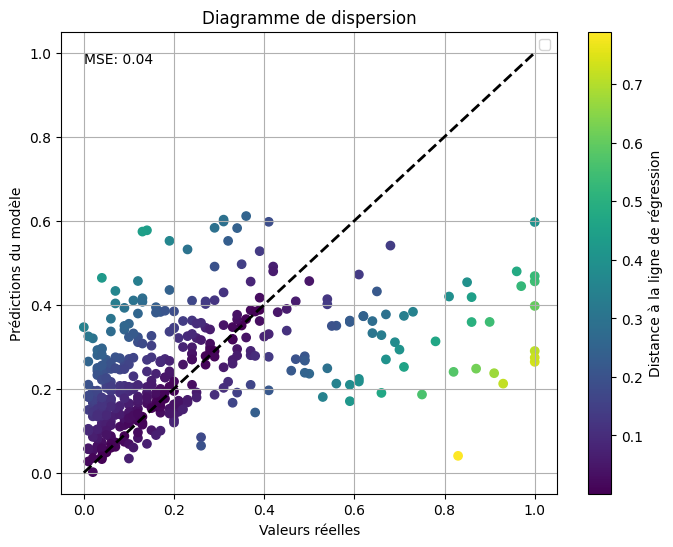

In [67]:
# Calculer la distance entre les valeurs réelles et les prédictions du modèle
distances = np.abs(y_test - y_pred)

# Définir la colormap et normaliser les distances
norm = plt.Normalize(distances.min(), distances.max())
cmap = plt.cm.viridis

# Tracer le diagramme de dispersion avec une couleur dégradée basée sur la distance à la ligne de régression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=distances, cmap=cmap, norm=norm)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.colorbar(label='Distance à la ligne de régression')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions du modèle')
plt.title('Diagramme de dispersion')
plt.text(y_test.min(), y_test.max(), 'MSE: {:.2f}'.format(mse), verticalalignment='top')
plt.legend()
plt.grid(True)
plt.show()

### **2. Algorithme de Support Vector Machine Regression (SVM-R) :**
> Algorithme qui trouve l'hyperplan optimal dans un espace de grande dimension pour séparer les données en différentes classes. Ils sont efficaces dans les espaces de grande dimension et peuvent gérer des données non linéaires en utilisant des noyaux.

In [68]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser le modèle SVM pour la régression
svm_reg = SVR()

# Définir la grille des hyperparamètres à optimiser
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Utiliser la recherche sur grille pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions
best_svm_reg = grid_search.best_estimator_
y_pred_svm = best_svm_reg.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (MSE) pour le SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("Mean Squared Error (SVM):", mse_svm)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Meilleurs hyperparamètres: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Squared Error (SVM): 0.04182298476154149


> Un MSE de 0.0414 est assez bas, ce qui indique que le modèle SVM est capable de faire des prédictions assez précises sur le nombre de crimes violents par population.
>
> Cela signifie que les prédictions du modèle sont en moyenne assez proches des valeurs réelles du nombre de crimes violents par population dans votre ensemble de test.
>
> Globalement, un MSE aussi bas suggère que le modèle SVM performe bien pour ce problème de prédiction.

#### **Courbe d'apprentissage**
___
> C'est une visualisation qui montre comment les performances d'un modèle évoluent en fonction de la taille de l'ensemble d'entraînement. Elle permet de comprendre comment le modèle se comporte lorsque la quantité de données d'entraînement varie.

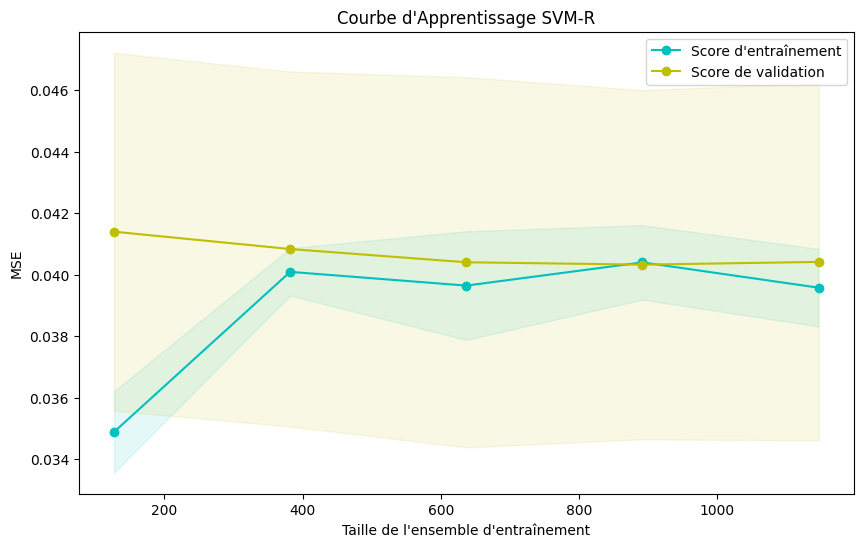

In [71]:
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

# Calculer la courbe d'apprentissage
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=svm_reg,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,  # Nombre de plis pour la validation croisée
    scoring='neg_mean_squared_error',  # Métrique à utiliser
    n_jobs=-1  # Utiliser tous les coeurs CPU disponibles
)

# Calculer les scores moyens et les écarts-types
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='c', label='Score d\'entraînement')
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color='y', label='Score de validation')
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='c')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='y')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('MSE')
plt.title('Courbe d\'Apprentissage SVM-R')
plt.legend(loc='best')
plt.show()


> Ce graphique permet de comprendre à partir d'une taille de 400 exemple d'entrainement, la différence entre le score de celui-ci et le score de validation est assez minimale.


___
## B. Selon les caractéristiques sociales :

On va appliquer les algorithmes de **Régression linéaire**, d'**Arbres de décision** et de **Forêts Aléatoires**  en prenant en compte deux features : 
*     **DivorceRate**: Le taux de divorce, calculé en combinant les pourcentages de personnes divorcées.
*     **EducatedEmployed**: Le pourcentage de personnes ayant au moins un diplôme d'études secondaires et étant employées.


___
## Protocole expérimental : 
Séparation des données en deux parties : **80%** pour l'apprentissage et **20%** pour la validation.

In [72]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(communities_and_crime[['DivorceRate', 'EducatedEmployed']], communities_and_crime['ViolentCrimesPerPop'], test_size=0.2, random_state=42)

___

### **1. Algorithme de Regression linéaire :**

In [73]:
# Initialiser le modèle
linear_reg = LinearRegression()

# Entraîner le modèle
linear_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_linear = linear_reg.predict(X_test)

# Évaluer les performances du modèle
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Effectuer une validation croisée
scores = cross_val_score(linear_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
# scoring='neg_mean_squared_error' pour utiliser l'erreur quadratique moyenne (MSE)

# Calculer le score moyen
mean_score = np.mean(scores)
# Afficher le résultat
print("Mean Squared Error (Cross-validated Linear Regression):", -mean_score)

# Afficher le taux d'erreur de cet algorithme
print("Mean Squared Error (Linear Regression):", mse_linear)

Mean Squared Error (Cross-validated Linear Regression): 0.035051620650431735
Mean Squared Error (Linear Regression): 0.03648569762921031


#### **Diagramme de dispersion avec ligne de régression**
___

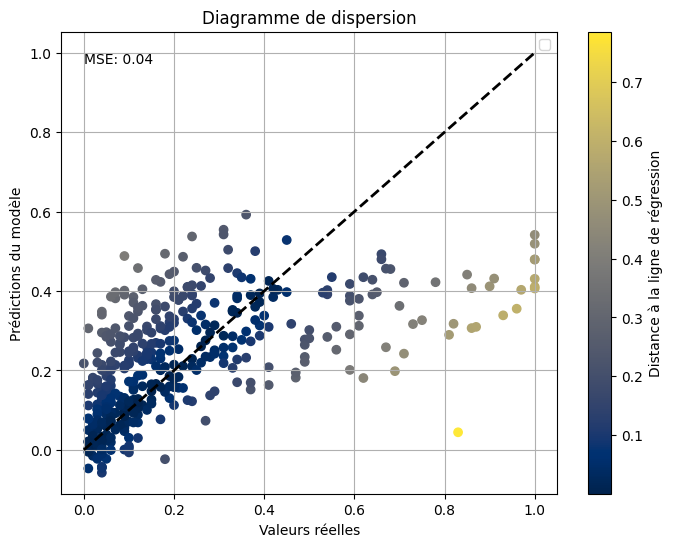

In [74]:
# Calculer la distance entre les valeurs réelles et les prédictions du modèle
distances = np.abs(y_test - y_pred_linear)

# Définir la colormap et normaliser les distances
norm = plt.Normalize(distances.min(), distances.max())
cmap = plt.cm.cividis

# Tracer le diagramme de dispersion avec une couleur dégradée basée sur la distance à la ligne de régression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, c=distances, cmap=cmap, norm=norm)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.colorbar(label='Distance à la ligne de régression')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions du modèle')
plt.title('Diagramme de dispersion')
plt.text(y_test.min(), y_test.max(), 'MSE: {:.2f}'.format(mse_linear), verticalalignment='top')
plt.legend()
plt.grid(True)
plt.show()

### **2. Algorithme d'Arbres de Décision (Regression):**
>Flexibles et peuvent capturer des relations non linéaires entre les caractéristiques et la variable cible.
>
>Peuvent gérer différents types de données et sont relativement robustes au bruit et aux valeurs aberrantes.

#### **Variation des performances avec la profondeur de l'arbre : Trouvons la profondeur de l'arbre optimale !**
___

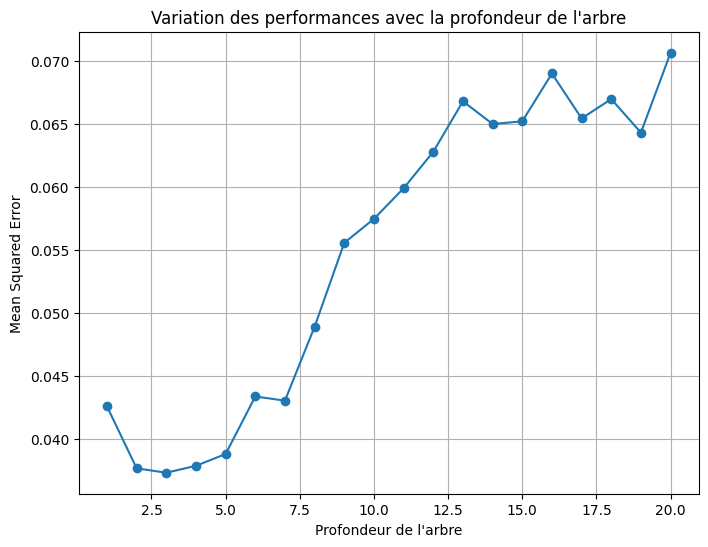

In [75]:
from sklearn.tree import DecisionTreeRegressor

# Tracer les performances en fonction de la profondeur de l'arbre
depths = range(1, 21)
mse_values = []

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(8, 6))
plt.plot(depths, mse_values, marker='o')
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('Mean Squared Error')
plt.title('Variation des performances avec la profondeur de l\'arbre')
plt.grid(True)
plt.show()

> Avec ce graphe, on a pu trouver que le meilleur paramètre de profondeur pour la performance optimale de ce modèle serait d'environ **3**.

In [78]:
# Initialiser le modèle
decision_tree_reg = DecisionTreeRegressor(max_depth=3)

# Entraîner le modèle
decision_tree_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_tree = decision_tree_reg.predict(X_test)

# Évaluer les performances du modèle
mse_tree = mean_squared_error(y_test, y_pred_tree)

# Afficher le taux d'erreur de cet algorithme
print("Mean Squared Error (Decision Tree):", mse_tree)

Mean Squared Error (Decision Tree): 0.037323502738489465


#### **Courbe d'apprentissage**
___

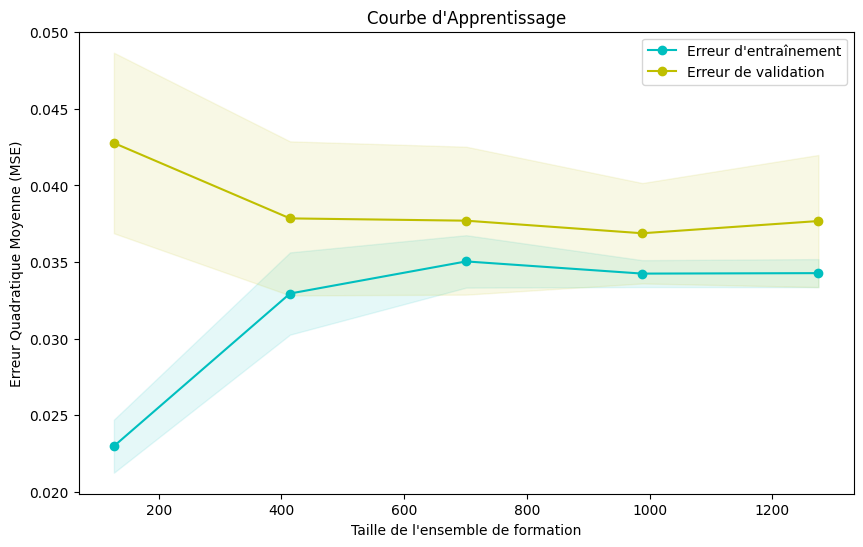

In [79]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculer les scores moyens et les écarts-types
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='c', label='Erreur d\'entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color='y', label='Erreur de validation')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='c')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='y')
plt.xlabel('Taille de l\'ensemble de formation')
plt.ylabel('Erreur Quadratique Moyenne (MSE)')
plt.title('Courbe d\'Apprentissage')
plt.legend(loc='best')
plt.show()

> On remarque donc que le meilleur nombre d'exemples pour entrainer cet algorithme serait à partir de **700**.

### 
### **3. Algorithme de Fôrets aléatoires (Régression) :**
  > Ensembles d'arbres de décision qui réduisent le surajustement (**overfitting**) et améliorent la généralisation en agrégeant les prédictions de plusieurs arbres.
  >
  > Robustes et offrent généralement de bonnes performances sans nécessiter beaucoup de réglages d'hyperparamètres.

In [80]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle
random_forest_reg = RandomForestRegressor()

# Entraîner le modèle
random_forest_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_forest = random_forest_reg.predict(X_test)

# Évaluer les performances du modèle
mse_forest = mean_squared_error(y_test, y_pred_forest)

# Afficher le taux d'erreur de cet algorithme
print("Mean Squared Error (Random Forest):", mse_forest)

Mean Squared Error (Random Forest): 0.04242856257401142


#### **Courbe d'apprentissage**
___

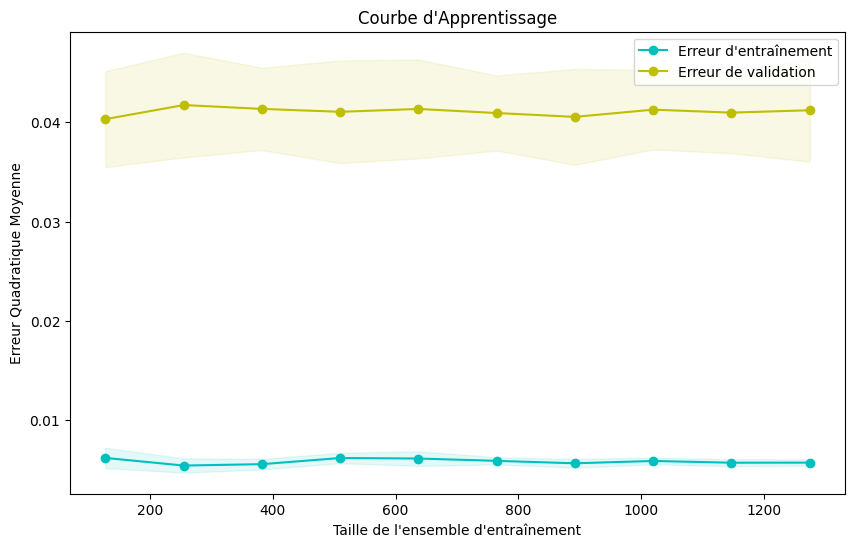

In [82]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculer les scores d'apprentissage et de validation
train_sizes_abs, train_scores, test_scores = learning_curve(random_forest_reg, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

# Calculer les scores moyens et les écarts-types
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='c', label='Erreur d\'entraînement')
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color='y', label='Erreur de validation')
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='c')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='y')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Erreur Quadratique Moyenne')
plt.title('Courbe d\'Apprentissage')
plt.legend(loc='best')
plt.show()

> Avec ce graphe, vu que les courbes d'erreur d'entraînement et de validation convergent, on pense que cela peut indiquer que le modèle est trop complexe pour la quantité de données disponible, ou que le modèle n'a pas la capacité d'apprendre la relation entre les caractéristiques et la cible.
> 


## C. Faisant le bilan de prédiction avec les différentes caractéristiques !
___
 On va appliquer l'algorithme de **Régression linéaire** et de **K-NN** en prenant en compte plusieurs features : 
 *     **TotalFamIncome**
 *     **UnemploymentRate**
 *     **DivorceRate**
 *     **EducatedEmployed**
 *     **youthIndex**
 *     **ethnicDiversityRatio**

___
## Protocole expérimental : 
Séparation des données en deux parties : **80%** pour l'apprentissage et **20%** pour la validation.

In [83]:
# X : Caractéristiques économiques
X = communities_and_crime[['TotalFamIncome', 'UnemploymentRate','DivorceRate','EducatedEmployed','youthIndex','ethnicDiversityRatio']]  
# y : Nombre de crimes violents par population
y = communities_and_crime['ViolentCrimesPerPop']

In [84]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

___

### **1. Algorithme de Régression Linéaire :**

In [85]:
# Initialiser le modèle de régression linéaire
linear_reg = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
linear_reg.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = linear_reg.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Linear Regression):", mse)

# Afficher les coefficients de régression
coefficients = pd.DataFrame(linear_reg.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error (Linear Regression): 0.03227934894241536
                      Coefficient
TotalFamIncome           0.073345
UnemploymentRate         0.409506
DivorceRate              0.496865
EducatedEmployed        -0.087796
youthIndex               0.081000
ethnicDiversityRatio    -0.796198


#### **Diagramme de dispersion avec ligne de régression**
___

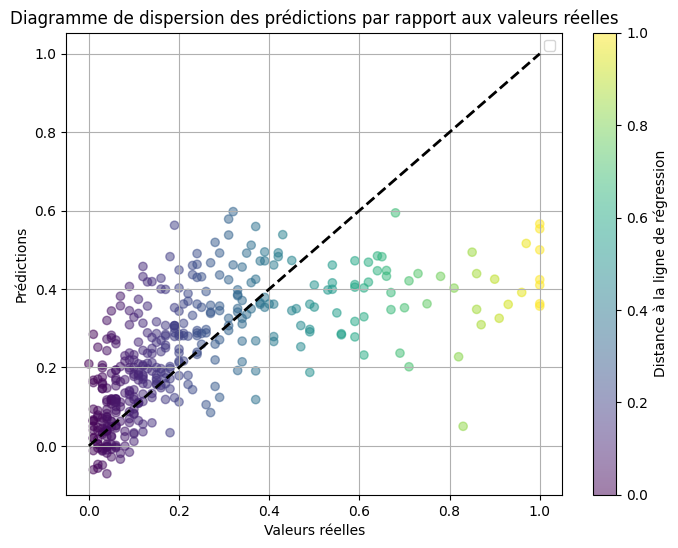

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=y_test, cmap='viridis', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Diagramme de dispersion des prédictions par rapport aux valeurs réelles')
plt.colorbar(label='Distance à la ligne de régression')
plt.grid(True)
plt.legend()
plt.show()

> On remarque que la dispersion au niveau des points par rapport à la droite est minime. 
>
> C'est donc un algorithme assez performant.

#### **Courbe d'apprentissage**
___

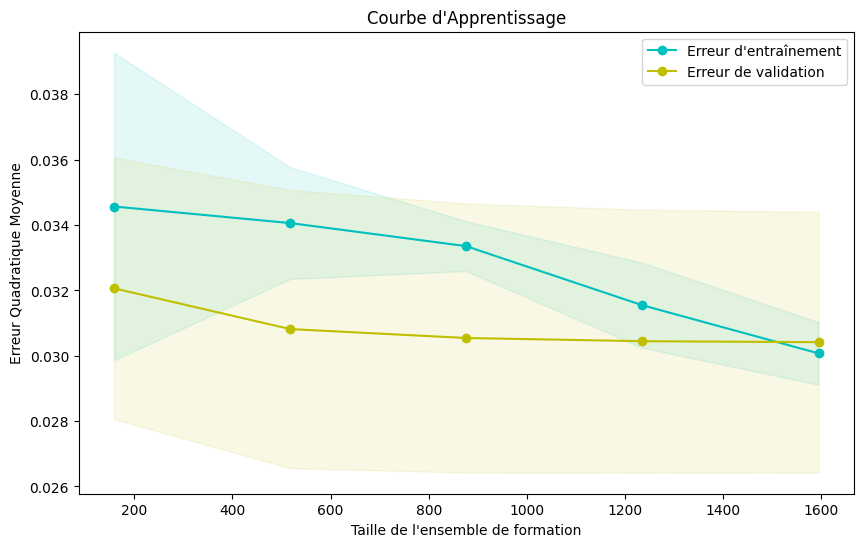

In [88]:
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')

# Calculer les scores moyens et les écarts-types
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='c', label='Erreur d\'entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color='y', label='Erreur de validation')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='c')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='y')
plt.xlabel('Taille de l\'ensemble de formation')
plt.ylabel('Erreur Quadratique Moyenne')
plt.title('Courbe d\'Apprentissage')
plt.legend(loc='best')
plt.show()


> La courbe d'apprentissage confirme notre constat antérieur, il y a une intersection entre les 2 courbes et on peut remarquer que c'est surtout à partir d'un échantillon de 1400 exemples qu'on a un bon modèle.

### **2. Algorithme de K-NN (Régression) :**

#### **Quelle valeur de K serait la plus optimale ?**
___
> On va appliquer l'algorithme de la validation croisée, pour ensuite utiliser la méthode du coude.

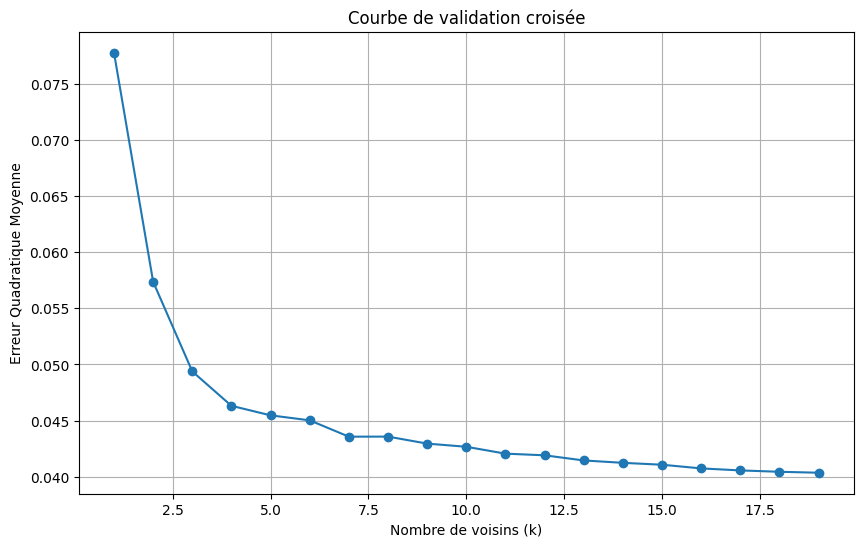

In [90]:
from sklearn.neighbors import KNeighborsRegressor

neighbors = list(range(1, 20))
cv_scores = []

# Effectuer une validation croisée pour chaque nombre de voisins
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

# Tracer la courbe de validation croisée
plt.figure(figsize=(10, 6))
plt.plot(neighbors, -np.array(cv_scores), marker='o')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Erreur Quadratique Moyenne')
plt.title('Courbe de validation croisée')
plt.grid(True)
plt.show()

> La méthode du coude nous a permis de trouver le meilleur paramètre K pour notre K-NN afin d'avoir la meilleure performance possible dans le cas actuel.
>
> De ce fait, le K optimal ici serait K = 4.

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser le modèle KNN
knn = KNeighborsRegressor(n_neighbors=4)

# Entraîner le modèle
knn.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test_scaled)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (KNN):", mse)

Mean Squared Error (KNN): 0.03467615914786967


#### **Diagramme de dispersion avec ligne de régression**
___

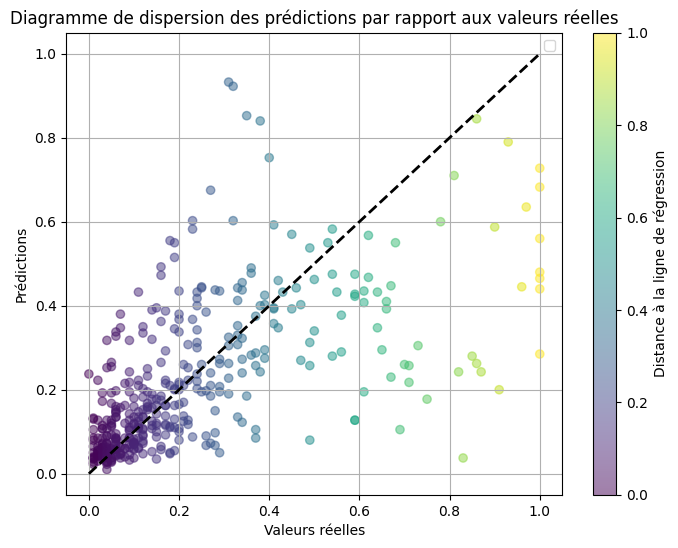

In [92]:
# Diagramme de dispersion des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=y_test, cmap='viridis', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Diagramme de dispersion des prédictions par rapport aux valeurs réelles')
plt.legend()
plt.colorbar(label='Distance à la ligne de régression')
plt.grid(True)
plt.show()

> Le résultat du mean square error ainsi que le diagramme de dispersion des prédictions nous permet de déduire que cet algorithme de régression est assez compatible à notre cas de figure et donne des résultats assez satisfaisants.

## Conclusion 
___

L'analyse des données sur la criminalité révèle que les facteurs économiques, éducatifs, sociaux et démographiques sont interconnectés et influencent significativement les taux de criminalité. 

Des revenus plus élevés et diversifiés, ainsi qu'une faible pauvreté et des taux de chômage bas, sont associés à des niveaux de criminalité plus faibles. 

L'éducation joue un rôle crucial, avec des états ayant un pourcentage élevé de diplômés du secondaire et des taux d'emploi élevés montrant des taux de criminalité plus bas. 

Les structures familiales stables et le soutien parental fort sont également liés à une réduction de la criminalité. 

De plus, la diversité ethnique et le niveau d'urbanisation influencent les taux de criminalité, les zones urbaines présentant des dynamiques variées selon la composition ethnique et la densité de population. 


Pour lutter contre la criminalité, il est recommandé d'investir dans l'éducation et l'emploi, de renforcer les structures familiales, de développer des politiques urbaines inclusives, et d'augmenter les aides publiques pour les populations vulnérables. 

Une approche holistique, intégrant ces mesures, est essentielle pour réduire efficacement les taux de criminalité en améliorant les conditions de vie et en soutenant les populations les plus vulnérables.

                               L3 DANT - Introduction à la Data Science - 2023/2024 ©